In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# C:/Windows/Fonts/H2GSRB.TTF
import matplotlib as mp
import matplotlib.font_manager as fm
import os
location = 'C:/Windows/Fonts/H2GSRB.TTF'
font_name = fm.FontProperties(fname=location).get_name()
mp.rc('font',family=font_name)

In [29]:
# 데이터 준비하기
filelists = ['./data/'+i for i in os.listdir('./data')]
seoul_locations = [i.split('_')[1] for i in filelists]

In [41]:
df_lists = [pd.read_csv(i,encoding='cp949',index_col=0) for i in filelists]
result = []
for idx,value in enumerate(df_lists):    
    value['지역'] = seoul_locations[idx]
    result.append(value)
    

In [42]:
df = pd.concat(result)

<AxesSubplot:>

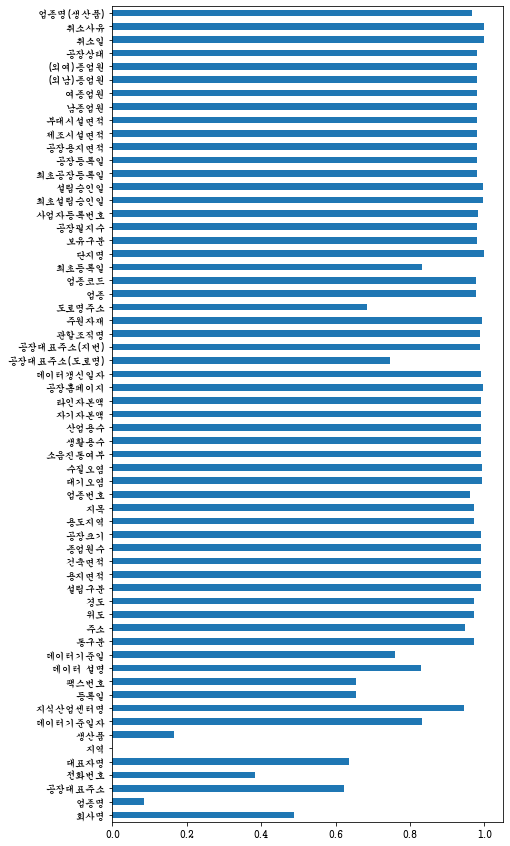

In [43]:
df.isna().mean().plot.barh(figsize=(7,15))

In [72]:
# 업종명,주소,회사명
find_cols = ['업종','주소','회사','생산','지역']
df.columns[ df.columns.str.contains('업종명')]

Index(['업종명', '업종명(생산품)'], dtype='object')

In [122]:
df_cols = [df.columns[ df.columns.str.contains(i)].to_list() for i in find_cols]
df_cols

[['업종명', '업종번호', '업종', '업종코드', '업종명(생산품)'],
 ['공장대표주소', '주소', '공장대표주소(도로명)', '공장대표주소(지번)', '도로명주소'],
 ['회사명'],
 ['생산품', '업종명(생산품)'],
 ['지역', '용도지역']]

In [123]:
# 파이썬에서 2차원리스트를 1차원으로 변경
# 중복을 제거하기 위해  set으로 리스트를 치환한다음 다시 라스트로 원복
df_cols =  sum(df_cols,[])
df_cols = list(set(df_cols))
df_cols

['지역',
 '용도지역',
 '업종명',
 '공장대표주소',
 '업종명(생산품)',
 '도로명주소',
 '회사명',
 '업종번호',
 '업종',
 '주소',
 '공장대표주소(지번)',
 '업종코드',
 '생산품',
 '공장대표주소(도로명)']

<AxesSubplot:>

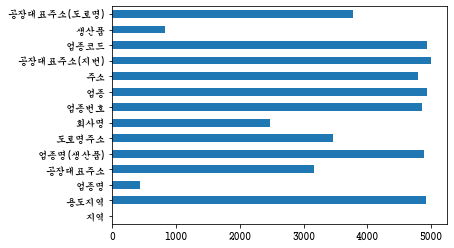

In [165]:
# 원하는 컬럼들의 결측치 시각화
df2 = df.loc[:,df_cols].copy()
df2.isna().sum().plot.barh()

In [166]:
df2.reset_index(drop=True,inplace=True)

In [167]:
# 업종명이 null인 데이터 중에서 생산품이 있는 데이터
index = df2[df2['업종명'].isna()].index
truefalse_index = df2.loc[index]['생산품'].isna() == False
index = df2.loc[index][truefalse_index].index
df2.loc[index,'업종명'] = df2.loc[index,'생산품']

In [168]:
# 업종명이 null인 데이터 중에서 업종명(생산품) 있는 데이터
index = df2[df2['업종명'].isna()].index
truefalse_index = df2.loc[index]['업종명(생산품)'].isna() == False
truefalse_index
index = df2.loc[index][truefalse_index].index
df2.loc[index,'업종명'] = df2.loc[index,'업종명(생산품)']

In [169]:
df2[df2['업종명'].isna()]

지역 용도지역  업종명 공장대표주소 업종명(생산품) 도로명주소  회사명 업종번호   업종   주소 공장대표주소(지번) 업종코드  \
1527  동작구  NaN  NaN    NaN      NaN   NaN  NaN  NaN  NaN  NaN        NaN  NaN   

      생산품 공장대표주소(도로명)  
1527  NaN         NaN

In [170]:
df2.drop(index=1527,inplace=True)

<AxesSubplot:>

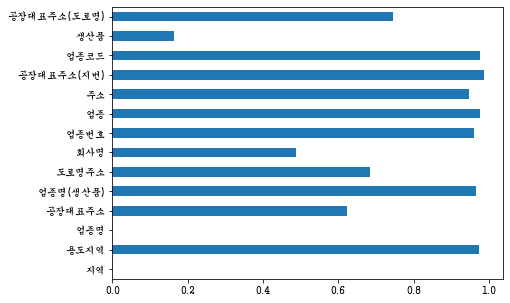

In [171]:
df2.isna().mean().plot.barh(figsize=(7,5))

In [172]:
# df3 = df2[df2.columns[df2.columns.str.contains('주소')]].copy()
temp = df2[df2['공장대표주소'].isna()]
index = temp[temp['주소'].isna() == False].index
df2.loc[index,'공장대표주소'] = df2.loc[index,'주소']

In [173]:
temp = df2[df2['공장대표주소'].isna()]
index = temp[temp['공장대표주소(도로명)'].isna() == False].index
df2.loc[index,'공장대표주소'] = df2.loc[index,'공장대표주소(도로명)']

In [174]:
temp = df2[df2['공장대표주소'].isna()]
index = temp[temp['도로명주소'].isna() == False].index
df2.loc[index,'공장대표주소'] = df2.loc[index,'도로명주소']

In [175]:
df2[df2['공장대표주소'].isna()]

지역 용도지역                        업종명 공장대표주소 업종명(생산품) 도로명주소     회사명 업종번호  \
4828  중랑구  NaN  가방 및 기타 보호용 케이스 제조업 외 4 종    NaN      NaN   NaN  가방클럽닷컴  NaN   

       업종   주소 공장대표주소(지번) 업종코드 생산품 공장대표주소(도로명)  
4828  NaN  NaN        NaN  NaN  가방         NaN

In [176]:
df2.drop(index=4828,inplace=True)

In [177]:
df2.reset_index(drop=True,inplace=True)

<AxesSubplot:>

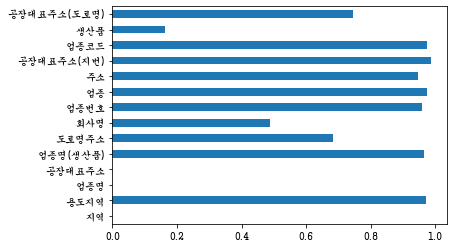

In [178]:
df2.isna().mean().plot.barh()

In [179]:
df3= df2[['지역','업종명','공장대표주소']].copy()

In [180]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      5063 non-null   object
 1   업종명     5063 non-null   object
 2   공장대표주소  5063 non-null   object
dtypes: object(3)
memory usage: 118.8+ KB


In [182]:
df3.to_csv('seroul_factory.csv',encoding='cp949',index=False)

In [183]:
df3 = pd.read_csv('seroul_factory.csv',encoding='cp949')
df3.head()

지역                  업종명                           공장대표주소
0  강동구   간판 및 광고물 제조업 외 1 종           서울특별시 강동구 상일로 31 (상일동)
1  강동구    기타 주변기기 제조업 외 2 종      서울특별시 강동구 성내동 397-10번지 지하1층
2  강동구       속도계 및 적산계기 제조업  서울특별시 강동구 양재대로103길 5,  지층 (성내동)
3  강동구  시계 및 시계부품 제조업 외 2 종    서울특별시 강동구 동남로53길 6,  2층 (둔촌동)
4  강동구       귀금속 및 관련제품 제조업       서울특별시 강동구 천중로 206, 2층 (길동)

<AxesSubplot:xlabel='count', ylabel='업종명'>

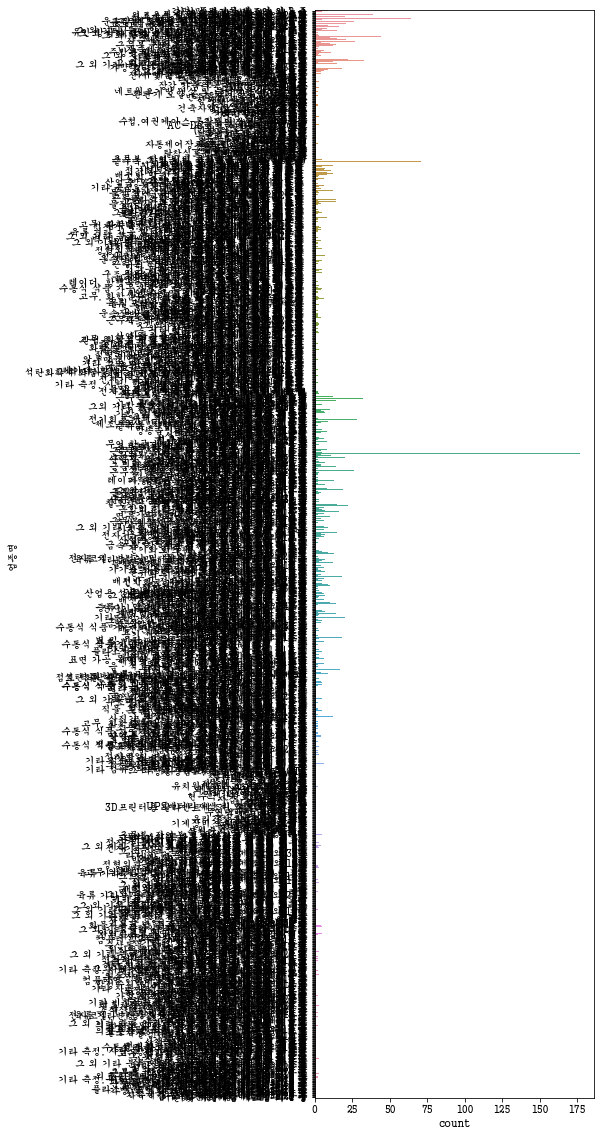

In [184]:
plt.figure(figsize=(5,20))
sns.countplot(data=df3,y='업종명')

In [194]:
# df3['업종명'].value_counts() > 5
temp_seri = df3['업종명'].value_counts()
index_5 = temp_seri[temp_seri > 5].index
index_5

Index(['기타 인쇄업 외 1 종', '배전반 및 전기 자동제어반 제조업', ' 주형 및 금형 제조업 ', '간판 및 광고물 제조업',
       '일반용 전기 조명장치 제조업', '그 외 기타 의료용 기기 제조업', '귀금속 및 관련제품 제조업', '경 인쇄업 외 1 종',
       '컴퓨터 제조업', '구두류 제조업',
       ...
       '간판 및 광고물 제조업 외 5 종', '방송장비 제조업 외 5 종', '유선 통신장비 제조업 외 3 종', '오프셋 인쇄업',
       ' 탭, 밸브 및 유사장치 제조업 ', '교통 신호장치 제조업 외 1 종', '배전반 및 전기 자동제어반 제조업 외 1 종',
       '도시락류 제조업 외 1 종', '건설 및 채광용 기계장비 제조업', '합성수지 및 기타 플라스틱 물질 제조업'],
      dtype='object', length=178)

In [307]:
df_5 =  df3[df3['업종명'].isin(index_5)].copy()
df_5['업종명'].value_counts()

기타 인쇄업 외 1 종          177
배전반 및 전기 자동제어반 제조업     73
 주형 및 금형 제조업           71
간판 및 광고물 제조업           68
일반용 전기 조명장치 제조업        64
                     ... 
오프셋 인쇄업                 6
방송장비 제조업 외 5 종          6
 남자용 겉옷 제조업 외 4 종       6
방송장비 제조업 외 4 종          6
교통 신호장치 제조업 외 1 종       6
Name: 업종명, Length: 178, dtype: int64

<AxesSubplot:xlabel='count', ylabel='업종명'>

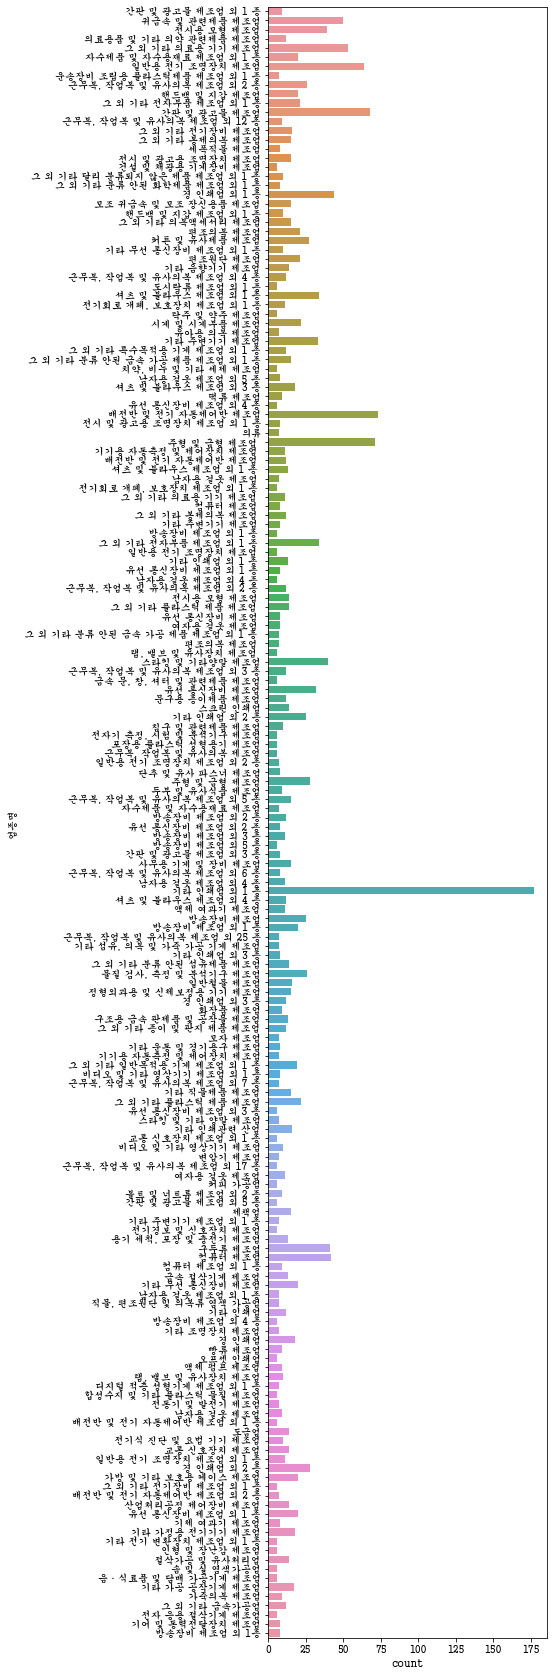

In [308]:
plt.figure(figsize=(5,30))
sns.countplot(data=df_5,y='업종명')

In [309]:
#그 외를 제외한 업종명
df_5.reset_index(drop=True,inplace=True)
temp_index =  df_5['업종명'][df_5['업종명'].str.contains('그 외|그외')==False]
index = df_5[df_5['업종명'].isin(temp_index.values)].index
df_5.loc[index,'업종명'].str.contains('그 외|그외').sum()
# df_5[df_5.loc[index,'업종명'].str.contains('그 외|그외')]


0

In [310]:
# '외' 가 들어간 문자열의 앞자리만 추출
str1 = '방송장비 제조업 외 1종'
str1[:str1.find('외')].strip()

'방송장비 제조업'

In [311]:
df_5.loc[index,'업종명'] = df_5.loc[index,'업종명'].apply(lambda x: x[:x.find('외')].strip())

In [312]:
df_5['업종명'].value_counts()

기타 인쇄업                  223
근무복, 작업복 및 유사의복 제조업     114
경 인쇄업                    84
셔츠 및 블라우스 제조업            77
배전반 및 전기 자동제어반 제조        73
                       ... 
전자기 측정, 시험 및 분석기구 제조      6
근무복, 작업복 및 유사의복 제조        6
전기경보 및 신호장치 제조            6
커피 가공                     6
포장용 플라스틱 성형용기 제조          6
Name: 업종명, Length: 137, dtype: int64

<AxesSubplot:xlabel='count', ylabel='업종명'>

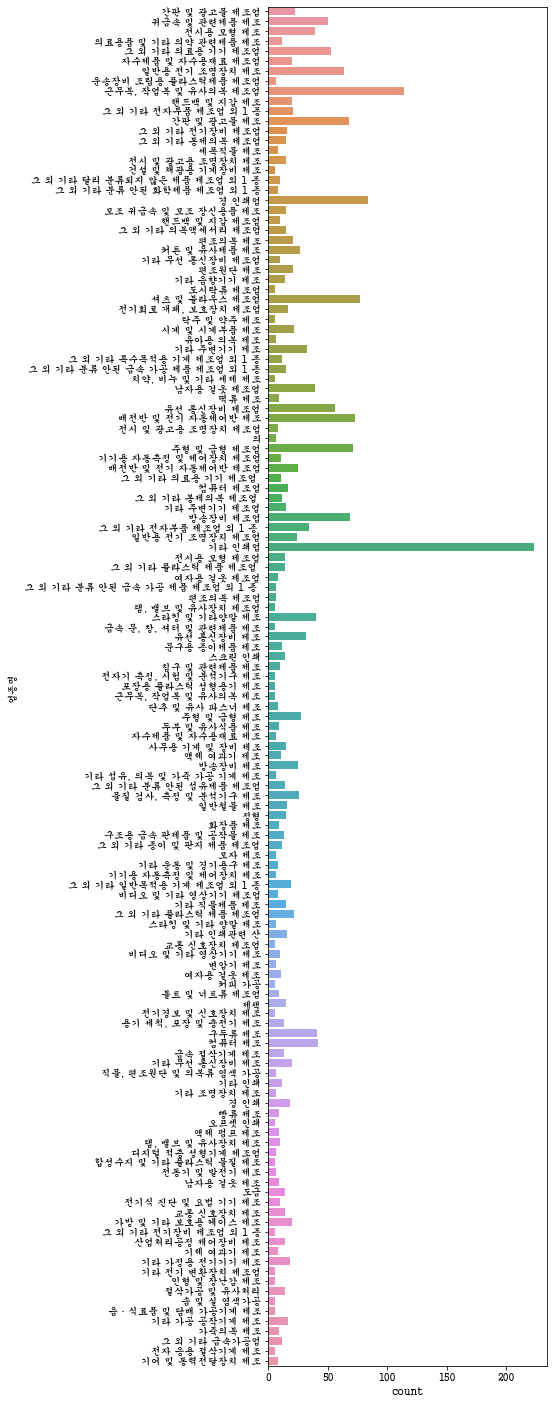

In [313]:
plt.figure(figsize=(5,25))
sns.countplot(data=df_5,y='업종명')

<AxesSubplot:xlabel='업종수', ylabel='업종명'>

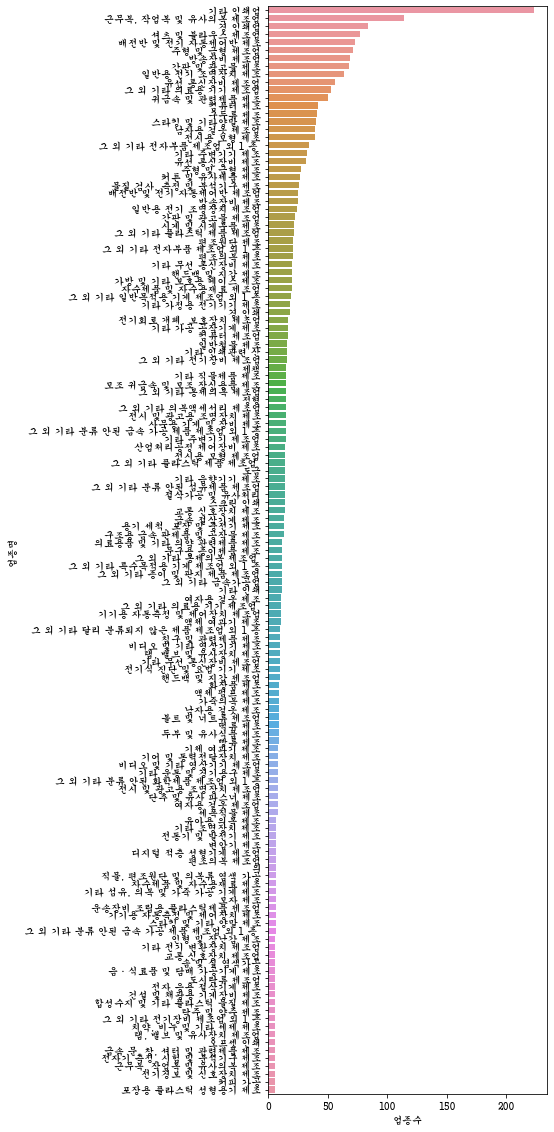

In [350]:
#서울시의 업종별 분포도 막대그래프
temp = df_5['업종명'].value_counts()
temp = temp.reset_index()
temp.columns = ['업종명','업종수']
plt.figure(figsize=(5,20))
sns.barplot(data=temp, y='업종명', x='업종수')

In [ ]:
# 고민... 업종명을 어떻게.... 재 구성...

In [353]:
df_5['공장대표주소']

0                              서울특별시 강동구 상일로 31 (상일동)
1                          서울특별시 강동구 천중로 206, 2층 (길동)
2                        서울특별시 강동구 천호옛길 17,  3층 (성내동)
3          서울특별시 강동구 양재대로81길 39,  이노빌딩 지하, 302호 (성내동)
4       서울특별시 강동구 상일로6길 55, 7층~8층 (상일동, NICE그룹 데이터센터)
                            ...                      
2698                         서울특별시 중랑구 용마산로 559 (신내동)
2699             서울특별시 중랑구 동일로140길 19-8, 지층. 1층 (중화동)
2700                 서울특별시 중랑구 상봉로25길 32, 지층,2층 (상봉동)
2701                    서울특별시 중랑구 중랑천로 358 (묵동, 동명빌딩)
2702                   서울특별시 중랑구 답십리로77길 89, 1층 (면목동)
Name: 공장대표주소, Length: 2703, dtype: object

In [316]:
# 업종명의 글자들을 단어단위로 분리
# 가장 빈도수가 많은 단어
# 업종을 renaming

In [355]:
# 도로명 주소를 가지고 위도 경로로 변경하는 라이브러리
!pip install geopy

In [357]:
from geopy.geocoders import Nominatim

In [358]:
from geopy.geocoders import Nominatim
def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)} # 위도 경도

    return crd
geocoding('서울특별시 강동구 상일로 31')

{'lat': '37.553051', 'lng': '127.1723493'}

In [359]:
geocoding('서울특별시 강동구 양재대로103길 5')

{'lat': '37.5335625', 'lng': '127.1352089'}

In [361]:
df_5['lat'] = 0
df_5['long'] = 0

In [366]:
for idx,addr in enumerate( df_5['공장대표주소']):
    try:
        addr = addr.split(',')[0]
        dic = geocoding(addr)
        df_5.loc[idx]['lat'] = dic['lat']
        df_5.loc[idx]['long'] = dic['lng']
        print('success')
    except Exception as e:
        print(e, addr)

'NoneType' object has no attribute 'latitude' 서울특별시 강동구 상일로 31 (상일동)


C:\Users\user\AppData\Local\Temp\ipykernel_14860\2714782742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5.loc[idx]['lat'] = dic['lat']
C:\Users\user\AppData\Local\Temp\ipykernel_14860\2714782742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5.loc[idx]['long'] = dic['lng']


success
success
success
success
success
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 강동구 상암로41길 31 (천호동
success
success
success
success
success
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 강동구 구천면로 259-1 (천호동
success
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 강동구 풍성로 154 (성내동
'NoneType' object has no attribute 'latitude' 서울특별시 강동구 명일로 230-12 (길동)
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 강동구 초광로294번길 144 (상일동)
'NoneType' object has no attribute 'latitude' 서울특별시 강동구 양재대로91가길 47-6 (성내동)
success
'NoneType' object has no attribute 'latitude' 서울특별시 강동구 구천면로 275 (천호동
'NoneType' object has no attribute 'latitude' 서울특별시 강동구 동남로 515 (둔촌동)
success
'NoneType' object has no attribute 'latitude' 서울특별시 강동구 성안로3길 117 (성내동)
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 강동구 올림픽로98길 11 (암사동
success
'NoneType' object has no attribut

'NoneType' object has no attribute 'latitude'  서울특별시 금천구 시흥대로123길 38 (독산동) 
success
'NoneType' object has no attribute 'latitude'  서울특별시 금천구 독산제1동 293-18번지 
'NoneType' object has no attribute 'latitude'  서울특별시 금천구 벚꽃로 332 (가산동) 
success
'NoneType' object has no attribute 'latitude'  서울특별시 금천구 시흥대로41길 49 (시흥동
'NoneType' object has no attribute 'latitude'  서울특별시 금천구 두산로 44 (독산동) 
'NoneType' object has no attribute 'latitude'  서울특별시 금천구 두산로10길 22
success
'NoneType' object has no attribute 'latitude'  서울특별시 금천구 범안로17길 64 (독산동) 
'NoneType' object has no attribute 'latitude'  서울특별시 금천구 두산로11길 36 (독산동) 
'NoneType' object has no attribute 'latitude'  서울특별시 금천구 범안로12가길 26 (독산동) 
'NoneType' object has no attribute 'latitude'  서울특별시 금천구 두산로11길 65 (가산동
'NoneType' object has no attribute 'latitude'  서울특별시 금천구 시흥대로123길 79 (독산동
'NoneType' object has no attribute 'latitude'  서울특별시 금천구 남부순환로 1372 (독산동
success
success
success
'NoneType' object has no attribute 'latitude'  서울특별시 금천구 두산로11길 38 (독산동) 
succ

'NoneType' object has no attribute 'latitude' 도봉구 도봉로 631 (쌍문동)
success
'NoneType' object has no attribute 'latitude' 도봉구 노해로46길 30 (쌍문동)
'NoneType' object has no attribute 'latitude' 도봉구 시루봉로11길 25-5 극동상가 1층. 지하1
'NoneType' object has no attribute 'latitude' 도봉구 도봉로110라길 70-15 (창동)
'NoneType' object has no attribute 'latitude' 도봉구 우이천로 199 (창동)
'NoneType' object has no attribute 'latitude' 도봉구 노해로62길 64 (창동)
'NoneType' object has no attribute 'latitude' 도봉구 우이천로4다길 47 (창동)
'NoneType' object has no attribute 'latitude' 도봉구 도당로 53 (방학동)
success
success
'NoneType' object has no attribute 'latitude' 도봉구 덕릉로 219 (창동)
'NoneType' object has no attribute 'latitude' 도봉구 덕릉로57길 52 (창동)
'NoneType' object has no attribute 'latitude' 도봉구 덕릉로63가길 12 (창동)
'NoneType' object has no attribute 'latitude' 도봉구 도봉산3길 27 (도봉동)
'NoneType' object has no attribute 'latitude' 도봉구 도당로15길 31 (방학동)
success
'NoneType' object has no attribute 'latitude' 도봉구 덕릉로59길 4 (창동)
'NoneType' object has no attribute 'latitude'

'NoneType' object has no attribute 'latitude' 서울특별시 서대문구 수색로2길 34 (남가좌동)
success
'NoneType' object has no attribute 'latitude' 서울특별시 서대문구 모래내로 461 (홍제동) 2충
'NoneType' object has no attribute 'latitude' 서울특별시 서대문구 홍제천로 34 (연희동)
success
'NoneType' object has no attribute 'latitude' 서울특별시 서대문구 홍제동 266-28번지 지하층
'NoneType' object has no attribute 'latitude' 서울특별시 서대문구 통일로9길 6-24 (냉천동)
'NoneType' object has no attribute 'latitude' 서울특별시 서대문구 응암로 116 (북가좌동)
'NoneType' object has no attribute 'latitude' 서울특별시 서대문구 가재울로6길 53-51 (남가좌동)
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 서대문구 홍제천로 80 (연희동)
success
success
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 서대문구 통일로 484 (홍제동
success
success
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 서대문구 통일로 161 (냉천동) 201호
'NoneType' object has no attribute 'latitude' 서울특별시 서대문구 서소문로 57 (합동)
success
success
'NoneType' object has no attribute 'latitude'

success
success
success
success
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수이로10길 14 (성수동2가
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 아차산로13길 53 (성수동2가)
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수일로12길 5 (성수동2가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 뚝섬로17가길 56 (성수동2가)
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 아차산로5길 24-41 (성수동2가)
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수일로6길 3 (성수동2가)
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 아차산로11길 18 (성수동2가
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 아차산로17길 9 (성수동2가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수이로3길 5 (성수동2가)
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 연무장19길 7 (성수동2가
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수이로26길 29 (성수동2가)
'NoneType'

'NoneType' object has no attribute 'latitude' 서울특별시 성동구 연무장17길 11 (성수동2가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 왕십리로14나길 6 (성수동1가)
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수이로26길 28 (성수동2가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 동일로 279 (송정동
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 상원2길 6 (성수동1가
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 난계로 35 (금호동1가)
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 용답중앙길 83 (용답동)
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수이로24길 38 (성수동2가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수이로26길 27-11 (성수동2가)
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 행당동 78번지 지층
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 청계천로12길 33 (마장동)
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 연무장13길 15 (성수동2가
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 금호로 86 (금호동1가
'NoneType' object has no attr

success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수일로11길 8 (성수동1가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 연무장11길 8 (성수동2가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수동2가 269-6번지 서흥공업사 2층
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 행당동 40-7번지
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 뚝섬로15길 16 (성수동2가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수이로7길 41-14 (성수동2가)
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 뚝섬로4길 21-1 (성수동1가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수이로 87 (성수동2가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 아차산로11가길 39 (성수동2가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수이로18길 41 (성수동2가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수이로7길 26 (성수동2가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 아차산로11길 12 (성수동2가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 연무장길 89 (성수동2가)
success
'NoneType' object has no attri

'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수일로1길 13 (성수동1가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수이로20길 42 (성수동2가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수이로22길 51 (성수동2가)
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 연무장5가길 11 (성수동2가)
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수2가제1동 418번지
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수일로4가길 10-57 (성수동2가)
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 아차산로5길 34 (성수동2가)
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 왕십리로10길 6 (성수동1가
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수이로20길 12 (성수동2가)
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 연무장5가길 25 (성수동2가
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 광나루로 144 (성수동1가) 더 스페이스 타워 5층 502호
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 성동구 성수일로6길 3 (성수동2가) 지시코별관2층
success
s

success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 송파구 방이동 196번지 대덕빌딩 3층
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 송파구 중대로9길 42-22 (가락동)
success
success
success
success
success
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 송파구 양재대로66길 36 (가락동
success
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 송파구 가락동 151번지 101호
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 송파구 양산로2길 44 (거여동
success
'NoneType' object has no attribute 'latitude' 서울특별시 송파구 동남로4길 25 (문정동
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 송파구 동남로13길 34 (가락동)
success
'NoneType' object has no attribute 'latitude' 서울특

success
success
success
success
success
success
success
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 영등포로5길 19 (양평동2가) 6층 601호~603호
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 문래동3가 54-66번지 에이스하이테크시티 지하동 2층 207호
success
success
success
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 경인로74길 7-4 (문래동1가)
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 문래로 55 (문래동6가
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 가마산로90길 13-1 (신길동)
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 영등포동4가 111번지
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 디지털로48가길 16 (대림동
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 경인로80길 3-2 (문래동1가)
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 가마산로90길 6 (신길동
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 도림로147길 11-5 (문

success
success
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 영신로 175 (당산동3가)
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 경인로112길 7 (영등포동1가)
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 영신로30길 12 (영등포동4가)
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 문래로 149 (문래동3가)
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 경인로74길 13-1 (문래동1가)
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 양평로28다길 5 (양평동6가)
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 양평로28마길 24 (양평동6가
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 도림로145길 17 (문래동4가)
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 선유로23길 12-1 (양평동1가)
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 도림로139길 10 (문래동2가)
'NoneType' object has no attribute 'latitude' 서울특별시 영등포구 대림로40길 6 (대림동)
success
'NoneType' object has no attribute 'latitude' 서울특별시 영등

success
'NoneType' object has no attribute 'latitude' 서울특별시 종로구 율곡로17길 8 (이화동) 301호
'NoneType' object has no attribute 'latitude' 서울특별시 종로구 종로22길 14-1 (장사동)
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 종로구 필운대로 36 (누하동)
'NoneType' object has no attribute 'latitude' 서울특별시 종로구 평동 39번지
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 종로구 창경궁로 245 (명륜2가)
'NoneType' object has no attribute 'latitude' 서울특별시 종로구 창신길 59 (창신동
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 종로구 홍지문길 2 (홍지동)
success
'NoneType' object has no attribute 'latitude' 서울특별시 종로구 창경궁로16나길 30
'NoneType' object has no attribute 'latitude' 서울특별시 종로구 종로26길 14-10 (장사동)
'NoneType' object has no attribute 'latitude' 서울특별시 종로구 돈화문로 84 (와룡동)
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 종로구 율곡로8길 37 (와룡동)
'NoneType' object has no attribute 'latitude' 서울특별시 종로구 사직로 105 (내자동)
'NoneType' object has no attribute 'latitude' 서울특별시 종로구 종로52길 43-17 (창신동)
s

success
'NoneType' object has no attribute 'latitude' 서울특별시 중랑구 신내로12길 36 (신내동)
'NoneType' object has no attribute 'latitude' 서울특별시 중랑구 신내역로3길 40-36 (신내동) B동 1207
success
'NoneType' object has no attribute 'latitude' 서울특별시 중랑구 용마산로118길 80 (망우동
'NoneType' object has no attribute 'latitude' 서울특별시 중랑구 사가정로46길 90 (면목동)
success
success
success
success
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 중랑구 신내역로3길 40-36 (신내동) B동 지상11층 B-1104호
'NoneType' object has no attribute 'latitude' 서울특별시 중랑구 신내역로3길 40-36 (신내동) A동 609
success
'NoneType' object has no attribute 'latitude' 서울특별시 중랑구 동일로118길 35 (상봉동)
'NoneType' object has no attribute 'latitude' 서울특별시 중랑구 망우로 488 (망우동
success
'NoneType' object has no attribute 'latitude' 서울특별시 중랑구 중랑천로 31 (면목동)
'NoneType' object has no attribute 'latitude' 서울특별시 중랑구 신내역로3길 40-36 (신내동) A동 8층 818호
'NoneType' object has no attribute 'latitude' 서울특별시 중랑구 망우제2동 508-18번지
success
success
'NoneType' object has no attribute 'latitude' 서울특별시 중랑구 신내역로

In [367]:
df_5.to_csv('last.csv',encoding='cp949',index=False)